In [ ]:
! pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.4 MB/s eta 0:00:00


In [ ]:
import transformers
import datasets
import torch
import numpy as np
import scipy as sp

In [ ]:
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).cuda()

In [ ]:
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
! pip install shap
import pandas as pd
import shap
import sklearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.3 MB/s eta 0:00:00


In [ ]:
explainer = shap.Explainer(f, tokenizer)

In [ ]:
imdb_train = datasets.load_dataset("imdb")["train"]
shap_values = explainer(imdb_train[:10], fixed_context=1, batch_size=2)

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 4it [00:24,  4.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 5it [00:31,  5.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 6it [00:41,  6.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 7it [00:47,  6.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 8it [00:52,  6.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 9it [01:01,  7.07s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (720 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 10it [01:12,  8.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 11it [01:21,  8.14s/it]


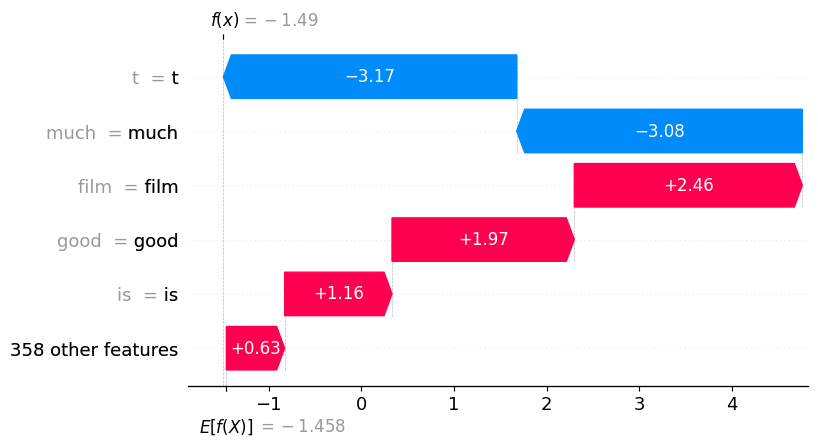

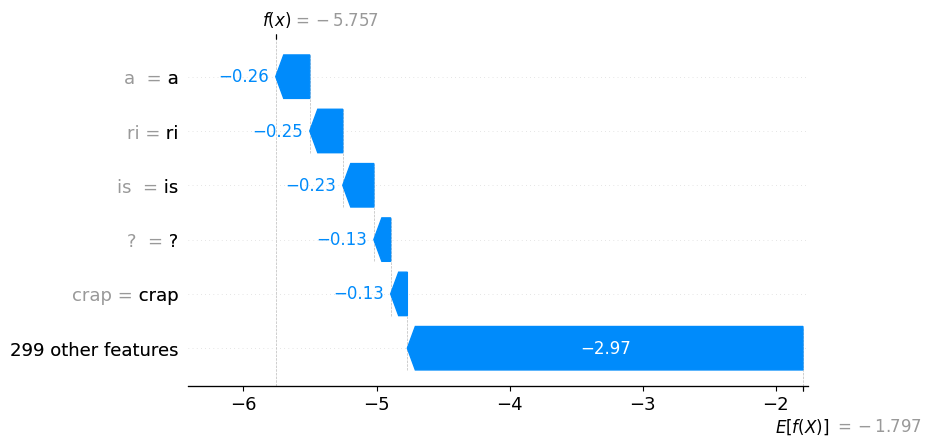

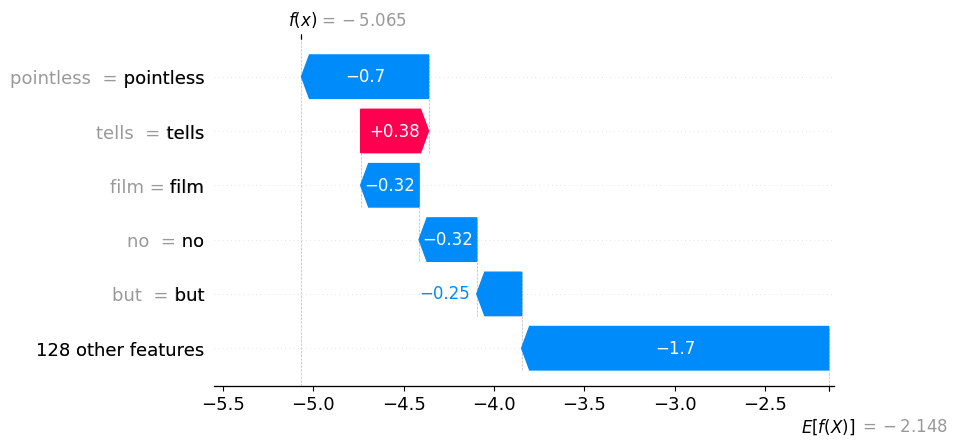

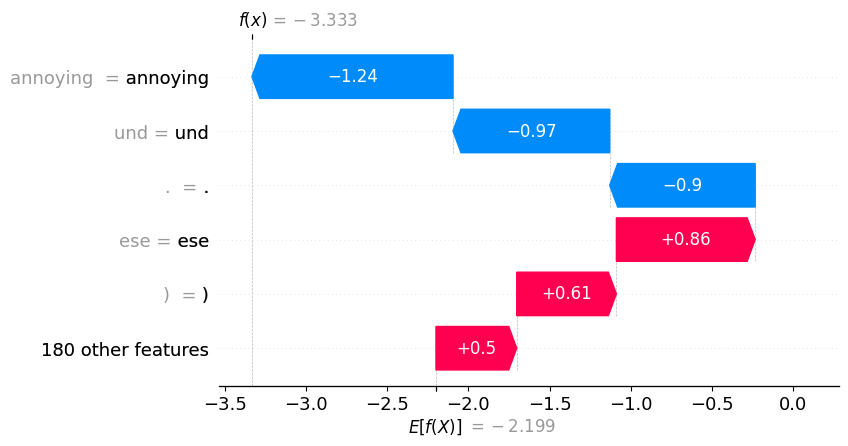

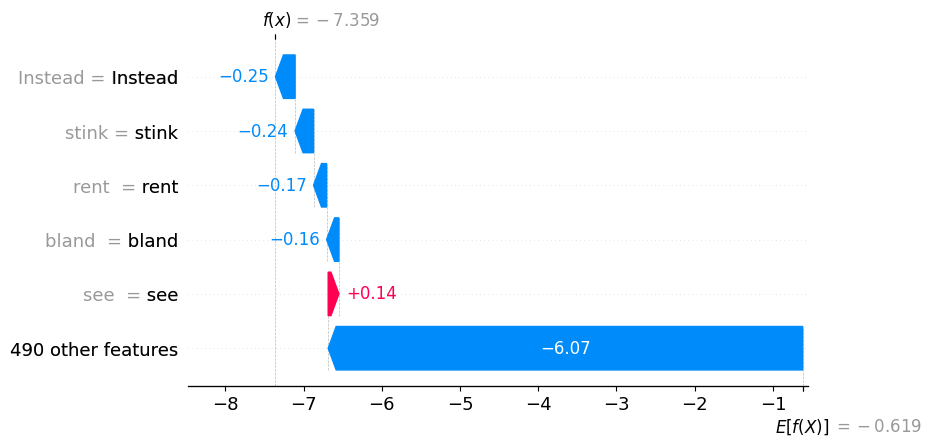

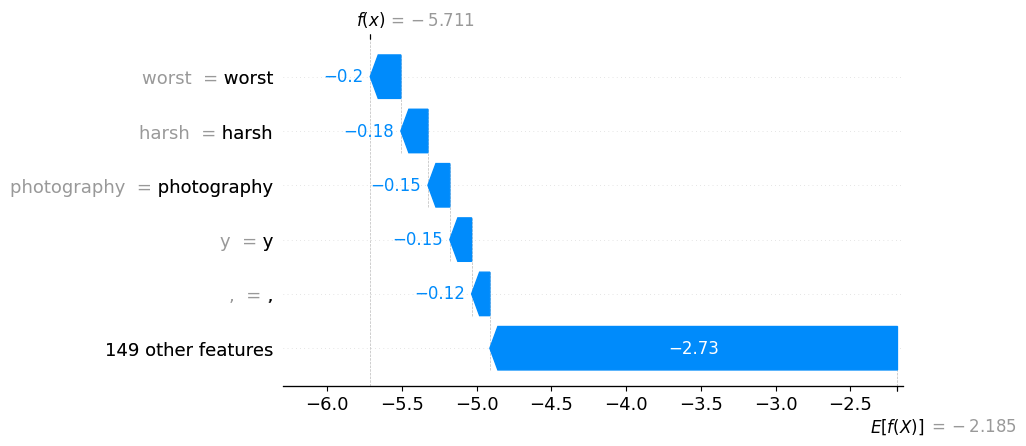

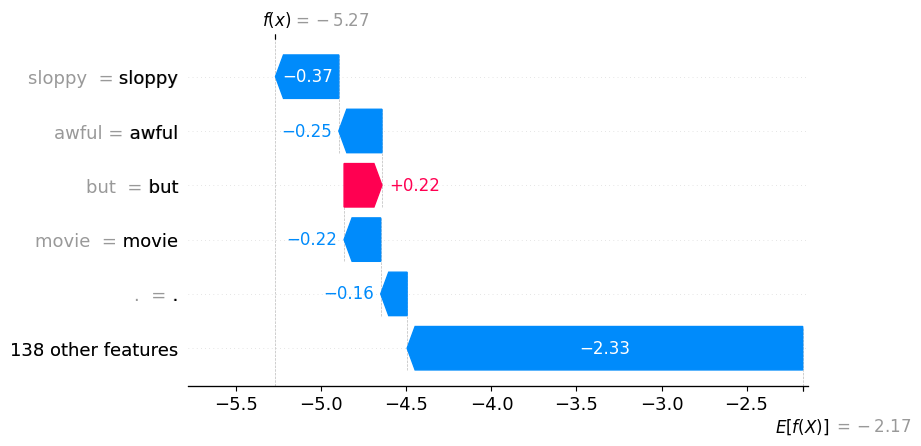

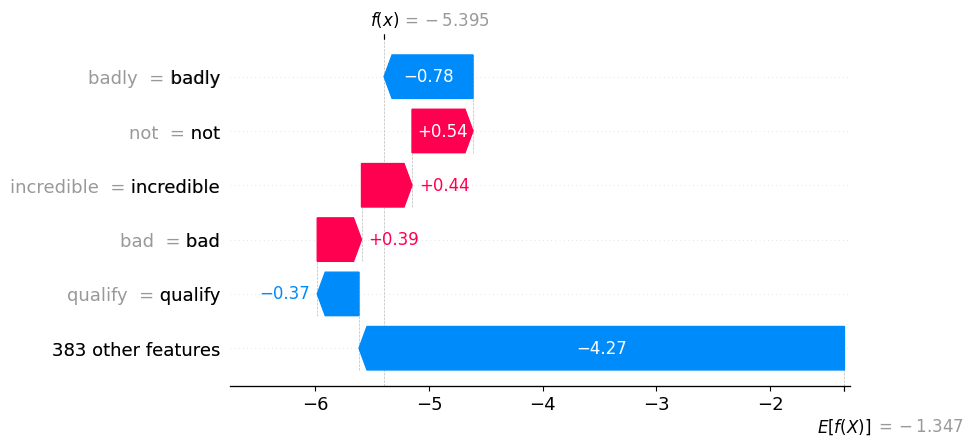

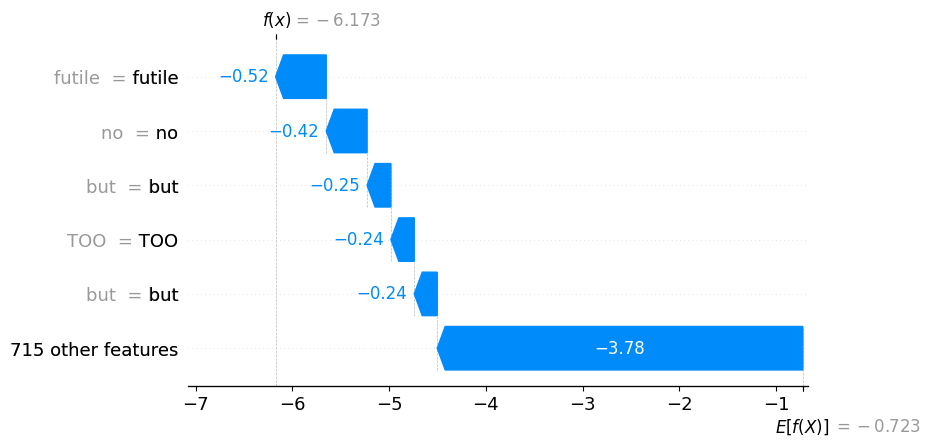

In [ ]:
for i in range(0, 9):
  shap.plots.waterfall(shap_values[i], max_display=6)


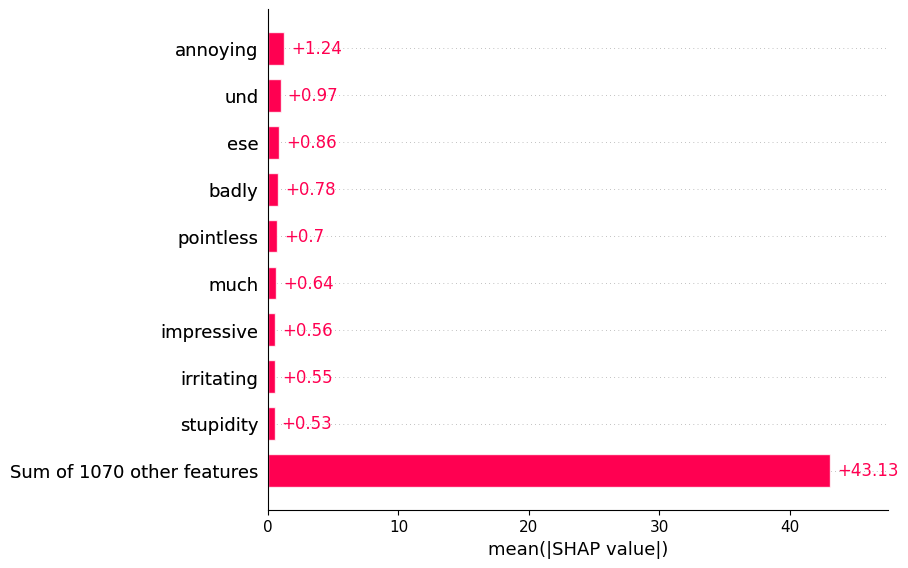

In [ ]:
shap.plots.bar(shap_values.abs.mean(0))

In [ ]:
len(shap_values[0])

363

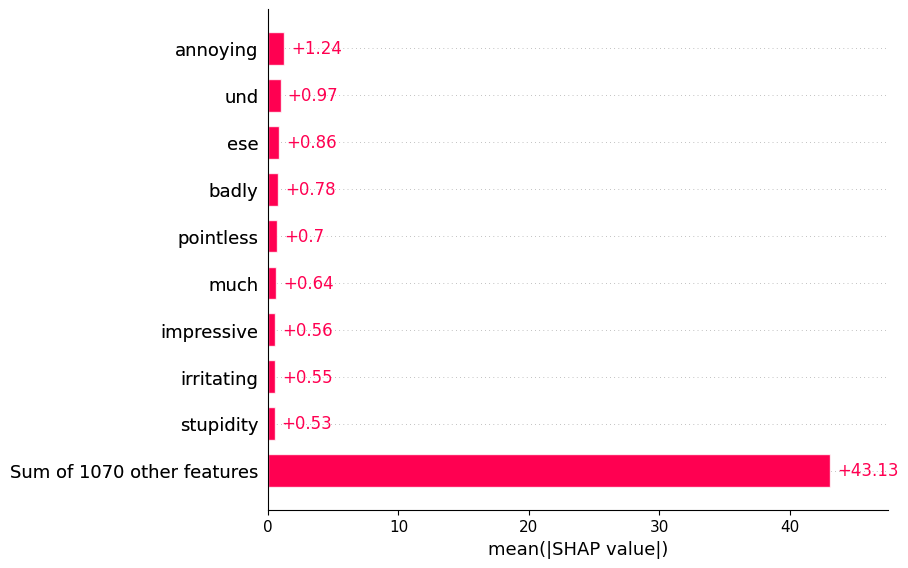

In [ ]:
shap.plots.bar(shap_values)